In [1]:
import keras
import os
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
np.random.seed(143)

In [3]:
os.environ["KERAS_BACKEND"] = 'tensorflow'

In [4]:
SIZE = 256
batch_size = 16

In [5]:
INPUT_SHAPE = (SIZE, SIZE, 3)

inp = keras.layers.Input(shape = INPUT_SHAPE)
conv1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(512, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(4, activation='softmax')(drop4)

In [6]:
model = keras.Model(inputs = inp, outputs = out)

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,388,580 (257.07 MB)

 Trainable params: 67,386,404 (257.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [9]:
#initialize datagen for train, test, validation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [10]:
#create generator/iterator

train_generator = train_datagen.flow_from_directory(
    'archive/train',
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'archive/val',
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    'archive/test',
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [11]:
images, labels = next(train_generator)


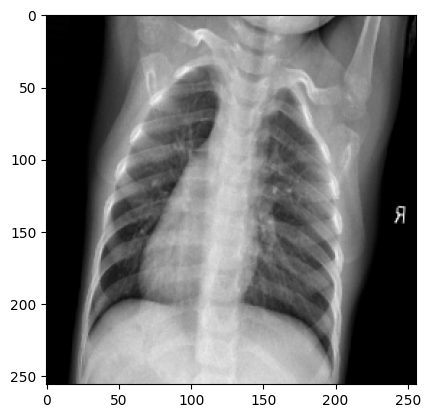

In [12]:
plt.imshow(images[0])

In [13]:
# from keras.callbacks import ModelCheckpoint

# filepath = "saved_models/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [cehckout]

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=2000//batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_batch_size=800//batch_size
)

Epoch 1/100


/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 73s 558ms/step - accuracy: 0.7271 - loss: 0.8760 - val_accuracy: 0.3421 - val_loss: 1.4681
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 66s 530ms/step - accuracy: 0.8378 - loss: 0.5027 - val_accuracy: 0.3947 - val_loss: 1.8035
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 546ms/step - accuracy: 0.8214 - loss: 0.5115 - val_accuracy: 0.4474 - val_loss: 1.8706
Epoch 4/100
 21/125 ━━━━━━━━━━━━━━━━━━━━ 54s 524ms/step - accuracy: 0.8617 - loss: 0.3527

2025-01-29 20:00:37.081896: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.8480 - loss: 0.3981 - val_accuracy: 0.4474 - val_loss: 1.5089
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 556ms/step - accuracy: 0.8450 - loss: 0.4324 - val_accuracy: 0.4737 - val_loss: 2.7193
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 567ms/step - accuracy: 0.8432 - loss: 0.4534 - val_accuracy: 0.7632 - val_loss: 0.5988
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 562ms/step - accuracy: 0.8361 - loss: 0.4177 - val_accuracy: 0.3684 - val_loss: 2.9701
Epoch 8/100
 21/125 ━━━━━━━━━━━━━━━━━━━━ 55s 532ms/step - accuracy: 0.9245 - loss: 0.2656

2025-01-29 20:04:20.962297: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.8883 - loss: 0.3520 - val_accuracy: 0.2895 - val_loss: 2.4691
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 559ms/step - accuracy: 0.8458 - loss: 0.4123 - val_accuracy: 0.2895 - val_loss: 9.9678
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 659ms/step - accuracy: 0.8612 - loss: 0.3830 - val_accuracy: 0.3947 - val_loss: 3.3026
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 89s 712ms/step - accuracy: 0.8549 - loss: 0.3850 - val_accuracy: 0.5000 - val_loss: 1.9527
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.8882 - loss: 0.3316 - val_accuracy: 0.3158 - val_loss: 4.6017
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 615ms/step - accuracy: 0.8818 - loss: 0.3134 - val_accuracy: 0.5263 - val_loss: 6.0779
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 95s 758ms/step - accuracy: 0.8858 - loss: 0.3349 - val_accuracy: 0.3421 - val_loss: 3.0323
Epoch 15/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 727ms/step - accuracy: 0.8978 - loss: 

2025-01-29 20:13:15.644547: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9074 - loss: 0.3022 - val_accuracy: 0.6053 - val_loss: 1.5251
Epoch 17/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 555ms/step - accuracy: 0.8898 - loss: 0.3114 - val_accuracy: 0.4737 - val_loss: 6.7020
Epoch 18/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 74s 590ms/step - accuracy: 0.9002 - loss: 0.2824 - val_accuracy: 0.2105 - val_loss: 10.1594
Epoch 19/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 666ms/step - accuracy: 0.8769 - loss: 0.3149 - val_accuracy: 0.7895 - val_loss: 0.7421
Epoch 20/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.8927 - loss: 0.2943 - val_accuracy: 0.7895 - val_loss: 0.5114
Epoch 21/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 628ms/step - accuracy: 0.8961 - loss: 0.2980 - val_accuracy: 0.3158 - val_loss: 7.1749
Epoch 22/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 574ms/step - accuracy: 0.9127 - loss: 0.2440 - val_accuracy: 0.5000 - val_loss: 2.6999
Epoch 23/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 621ms/step - accuracy: 0.9126 - loss

2025-01-29 20:29:41.192136: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8792 - loss: 0.3316 - val_accuracy: 0.6316 - val_loss: 1.8035
Epoch 33/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 597ms/step - accuracy: 0.9008 - loss: 0.2940 - val_accuracy: 0.6842 - val_loss: 1.2427
Epoch 34/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 611ms/step - accuracy: 0.9095 - loss: 0.2742 - val_accuracy: 0.5000 - val_loss: 4.8819
Epoch 35/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 85s 678ms/step - accuracy: 0.8902 - loss: 0.3290 - val_accuracy: 0.5526 - val_loss: 5.3078
Epoch 36/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.8857 - loss: 0.3451 - val_accuracy: 0.6053 - val_loss: 1.6786
Epoch 37/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 644ms/step - accuracy: 0.9109 - loss: 0.2669 - val_accuracy: 0.4211 - val_loss: 2.8186
Epoch 38/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 701ms/step - accuracy: 0.9087 - loss: 0.2521 - val_accuracy: 0.6316 - val_loss: 0.8015
Epoch 39/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 640ms/step - accuracy: 0.9052 - loss:

2025-01-29 21:04:24.573582: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.9402 - loss: 0.1896 - val_accuracy: 0.9211 - val_loss: 0.4209
Epoch 65/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 680ms/step - accuracy: 0.9337 - loss: 0.2015 - val_accuracy: 0.3947 - val_loss: 6.5583
Epoch 66/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 727ms/step - accuracy: 0.9174 - loss: 0.2184 - val_accuracy: 0.5263 - val_loss: 3.2758
Epoch 67/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 93s 744ms/step - accuracy: 0.9369 - loss: 0.1645 - val_accuracy: 0.4474 - val_loss: 3.6217
Epoch 68/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9213 - loss: 0.1733 - val_accuracy: 0.7895 - val_loss: 0.4545
Epoch 69/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 93s 731ms/step - accuracy: 0.9186 - loss: 0.2202 - val_accuracy: 0.9737 - val_loss: 0.1863
Epoch 70/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 92s 735ms/step - accuracy: 0.9323 - loss: 0.1815 - val_accuracy: 0.7895 - val_loss: 0.7077
Epoch 71/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 97s 772ms/step - accuracy: 0.9278 - loss

In [15]:
evaluation = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.7686 - loss: 0.5706


In [16]:
print(f'Test Loss: {evaluation[0]:.4f}')
print(f'Test Accuracy: {evaluation[1]:.4f}')

Test Loss: 0.9088
Test Accuracy: 0.6419


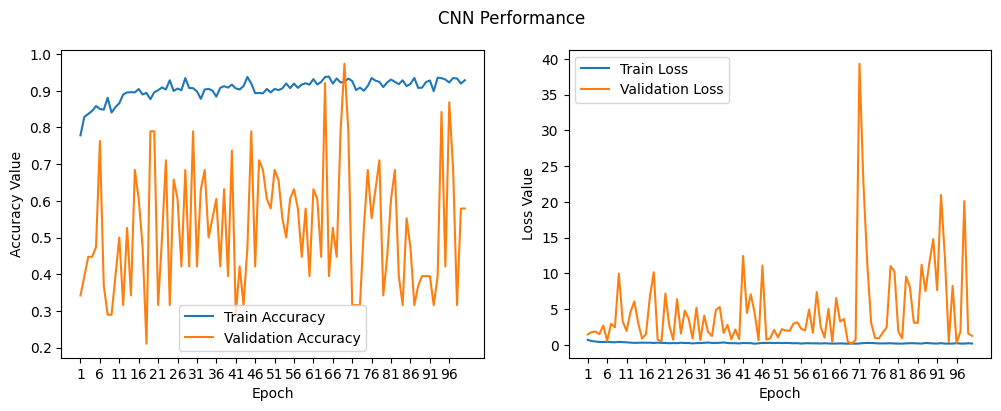

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
t = f.suptitle("CNN Performance")
max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel("Accuracy Value")
ax1.set_xlabel("Epoch")
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel("Loss Value")
ax2.set_xlabel("Epoch")
l2 = ax2.legend(loc="best")

In [18]:
model.save(os.path.expanduser('~/Desktop/xray_cnn.h5'))